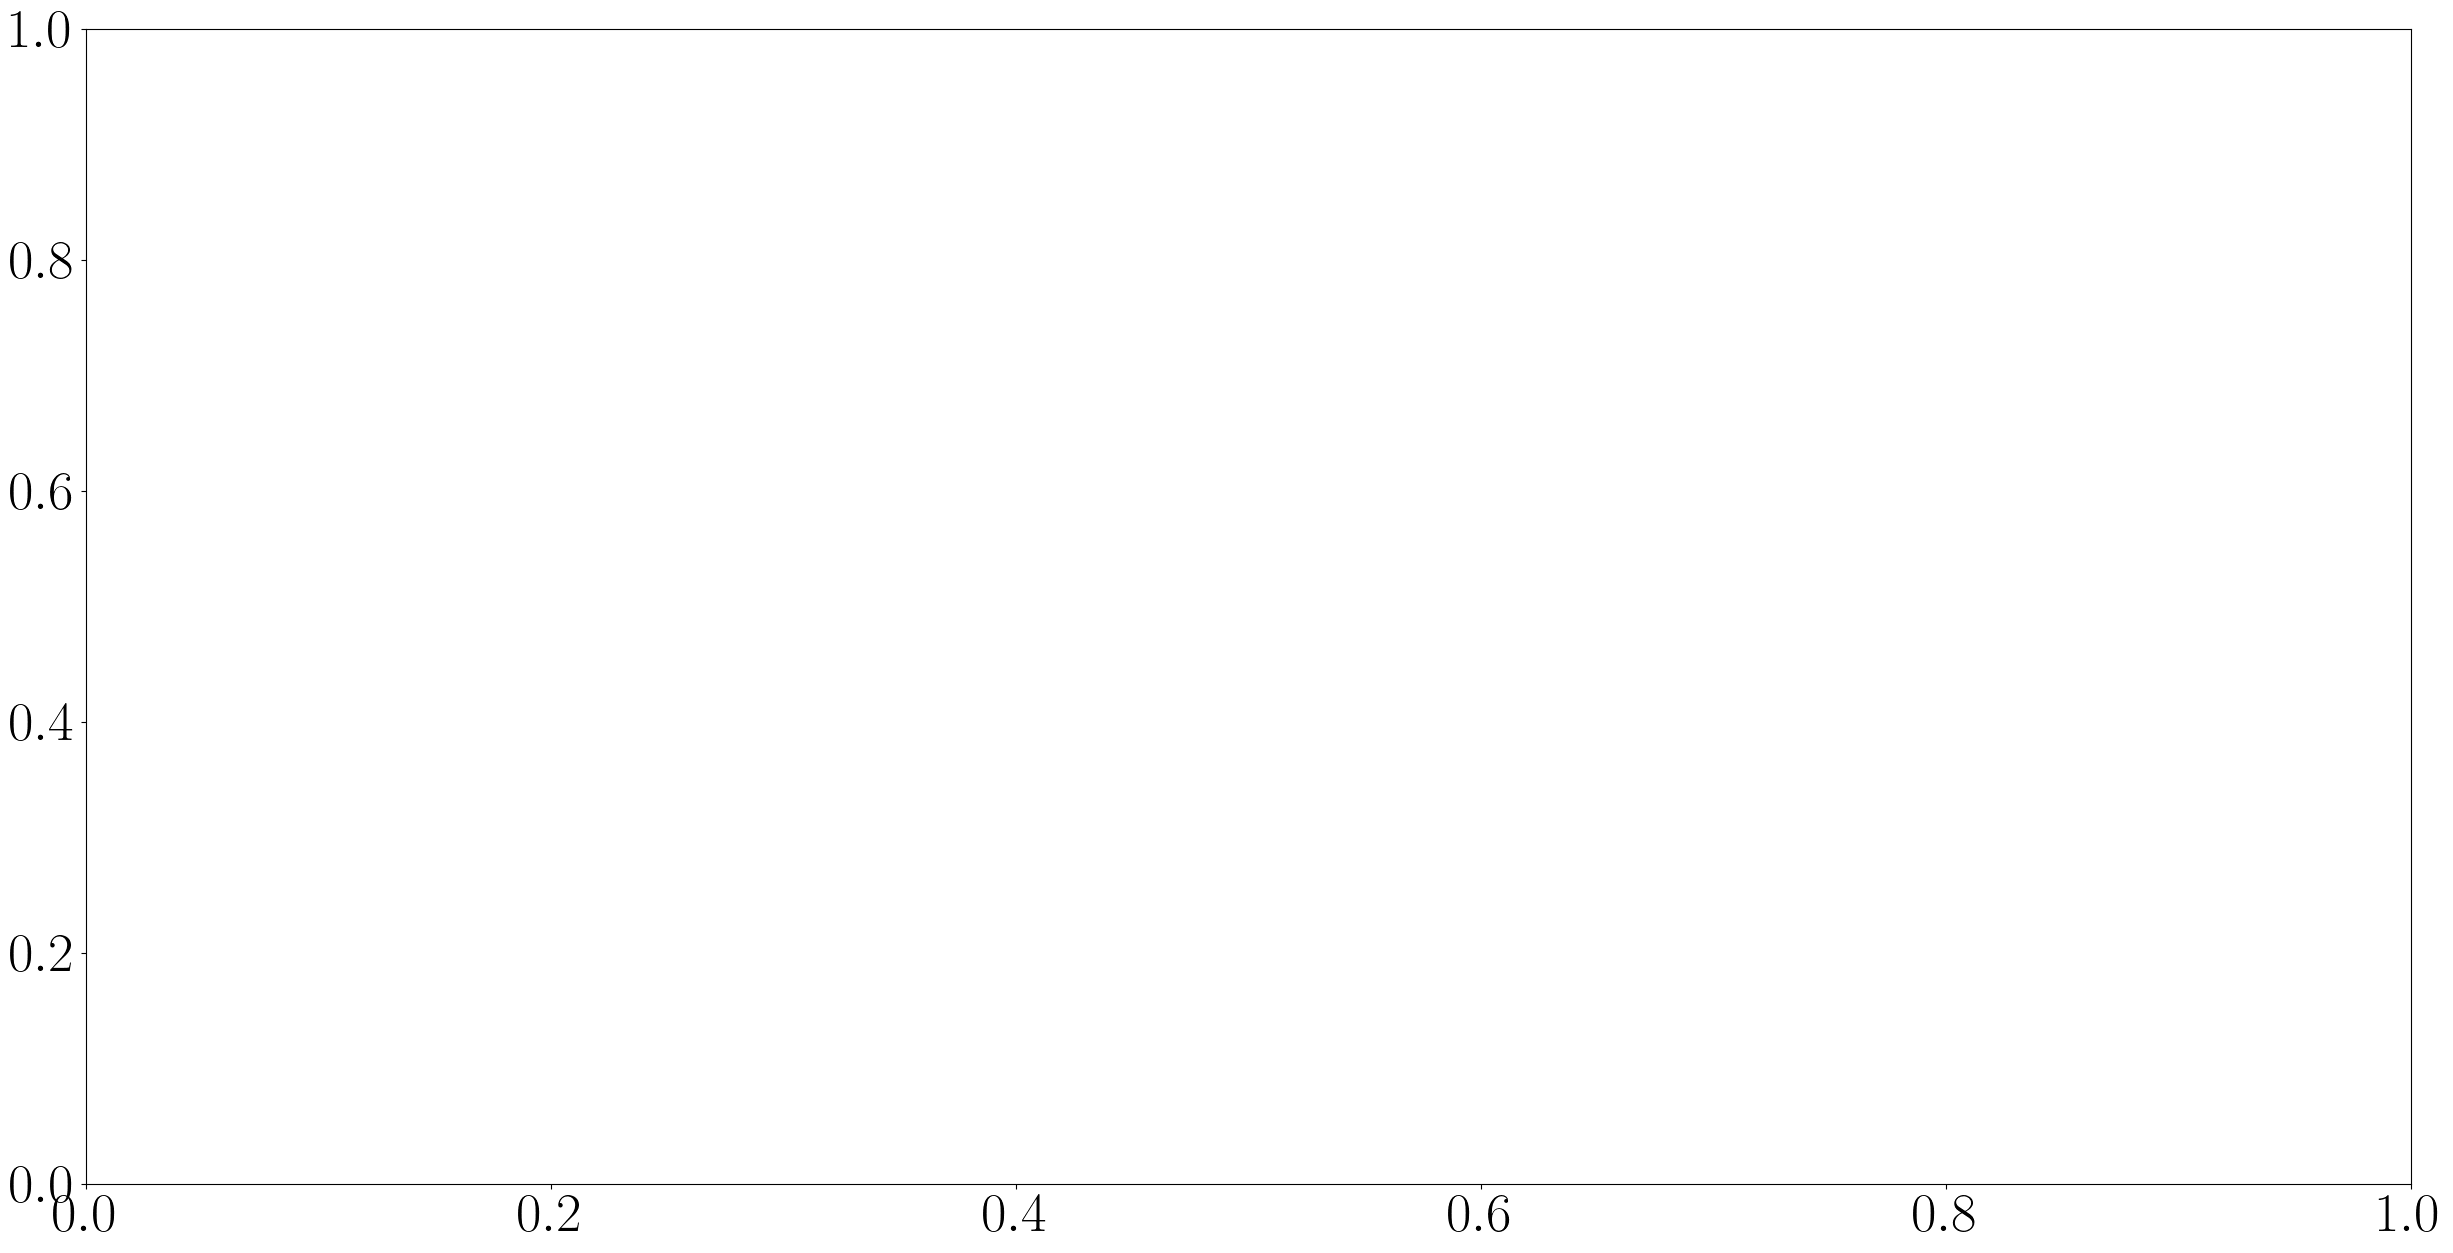

In [1]:
from Binaries import *

plt.rcParams["figure.figsize"] = [25, 9]

In [2]:
Events = EventGenerator("19_19.5", split = 1, apply_downsampling = True)

[INFO] -- LOADING LO_QUI_DON: randoms0264.csv                                                            


In [13]:
Traces = Events.__getitem__(2)

for _ in Traces:
    print(_)

||                      S===================S                         || 1.8102e+19 eV @ 284 m from core   
||                      S===============S                             || 1.8102e+19 eV @ 1171 m from core   
||                      S============S                                || 1.8102e+19 eV @ 1275 m from core   
||                      S========S                                    || 1.8102e+19 eV @ 1477 m from core   
||                      S==========S                                  || 1.8102e+19 eV @ 1525 m from core   
||                      S========S                                    || 1.8102e+19 eV @ 1722 m from core   
||                      S===========S                                 || 1.8102e+19 eV @ 1689 m from core   
||                      X                                             || 1.8102e+19 eV @ 2494 m from core   
||                      X                                             || 1.8102e+19 eV @ 2235 m from core   
||                  

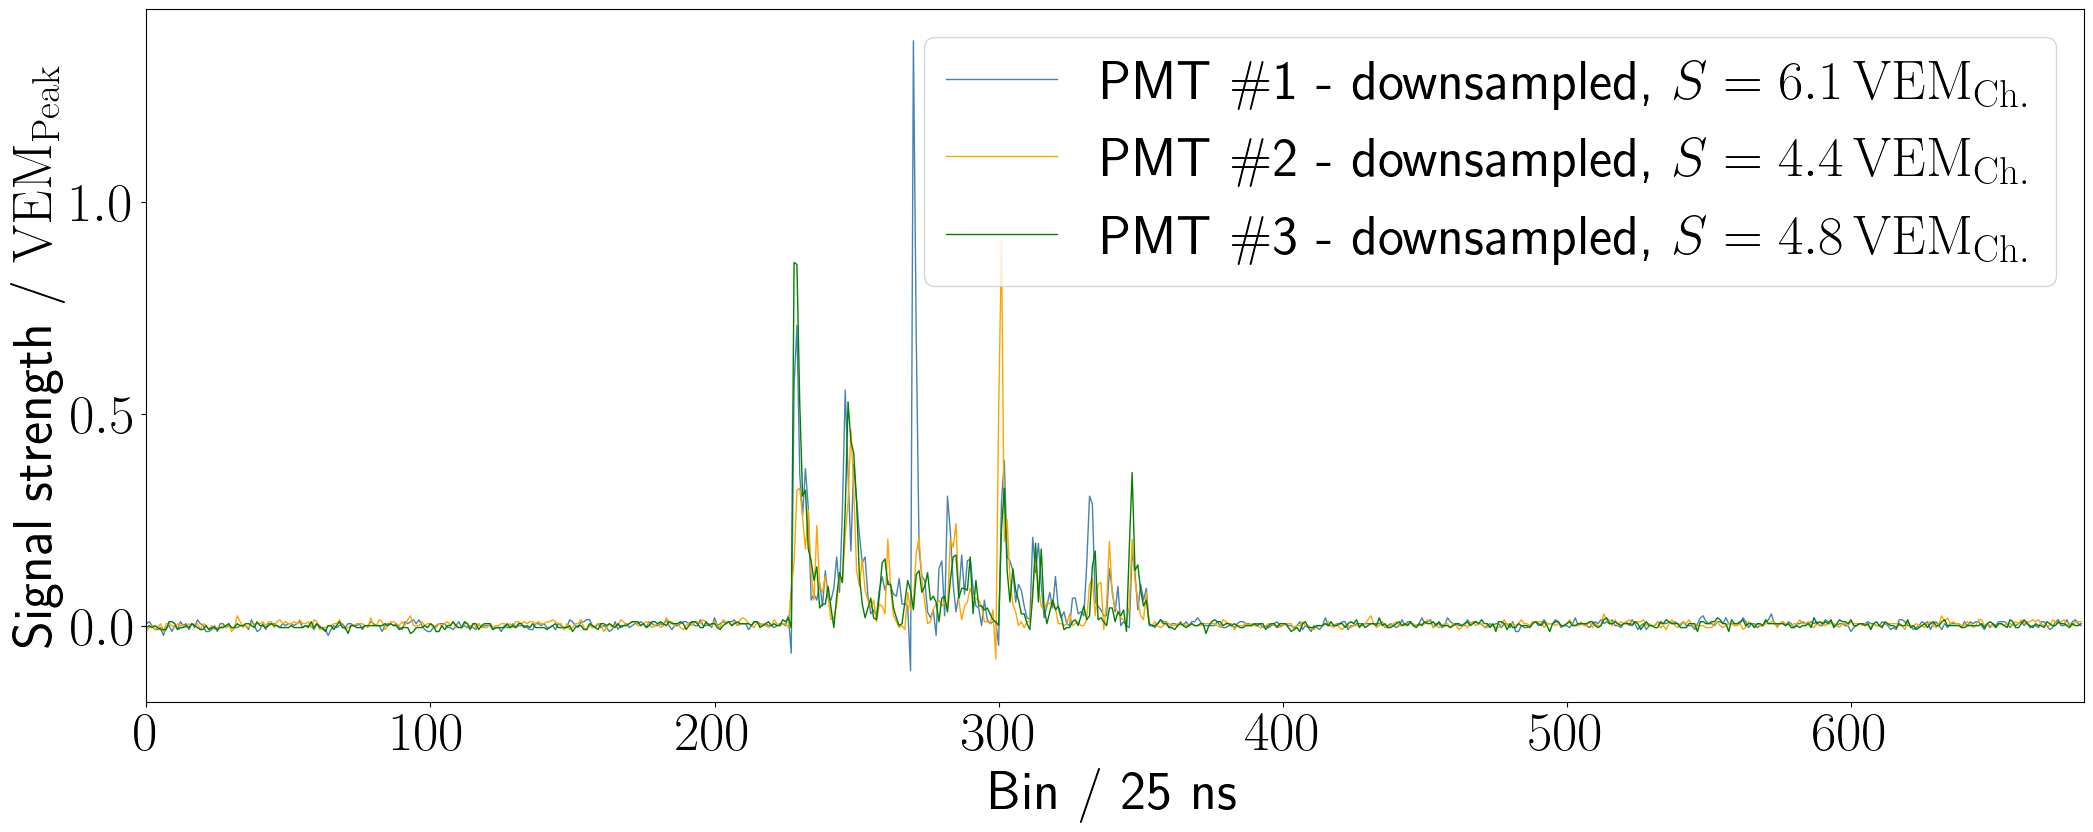

In [14]:
Traces[6].__plot__(plt.gca())
plt.show()

In [15]:
signal = [Traces[6].pmt_1, Traces[6].pmt_2, Traces[6].pmt_3]

# for information on this see GAP note 2018-01
dt      = 25                                                                # UB bin width
tau     = 67                                                                # decay constant
decay   = np.exp(-dt/tau)                                                   # decay term
deconvoluted_trace = []

for pmt in signal:
    deconvoluted_pmt = [(pmt[i] - pmt[i-1] * decay)/(1 - decay) for i in range(1,len(pmt))]
    deconvoluted_trace.append(deconvoluted_pmt)

(0.0, 681.0)

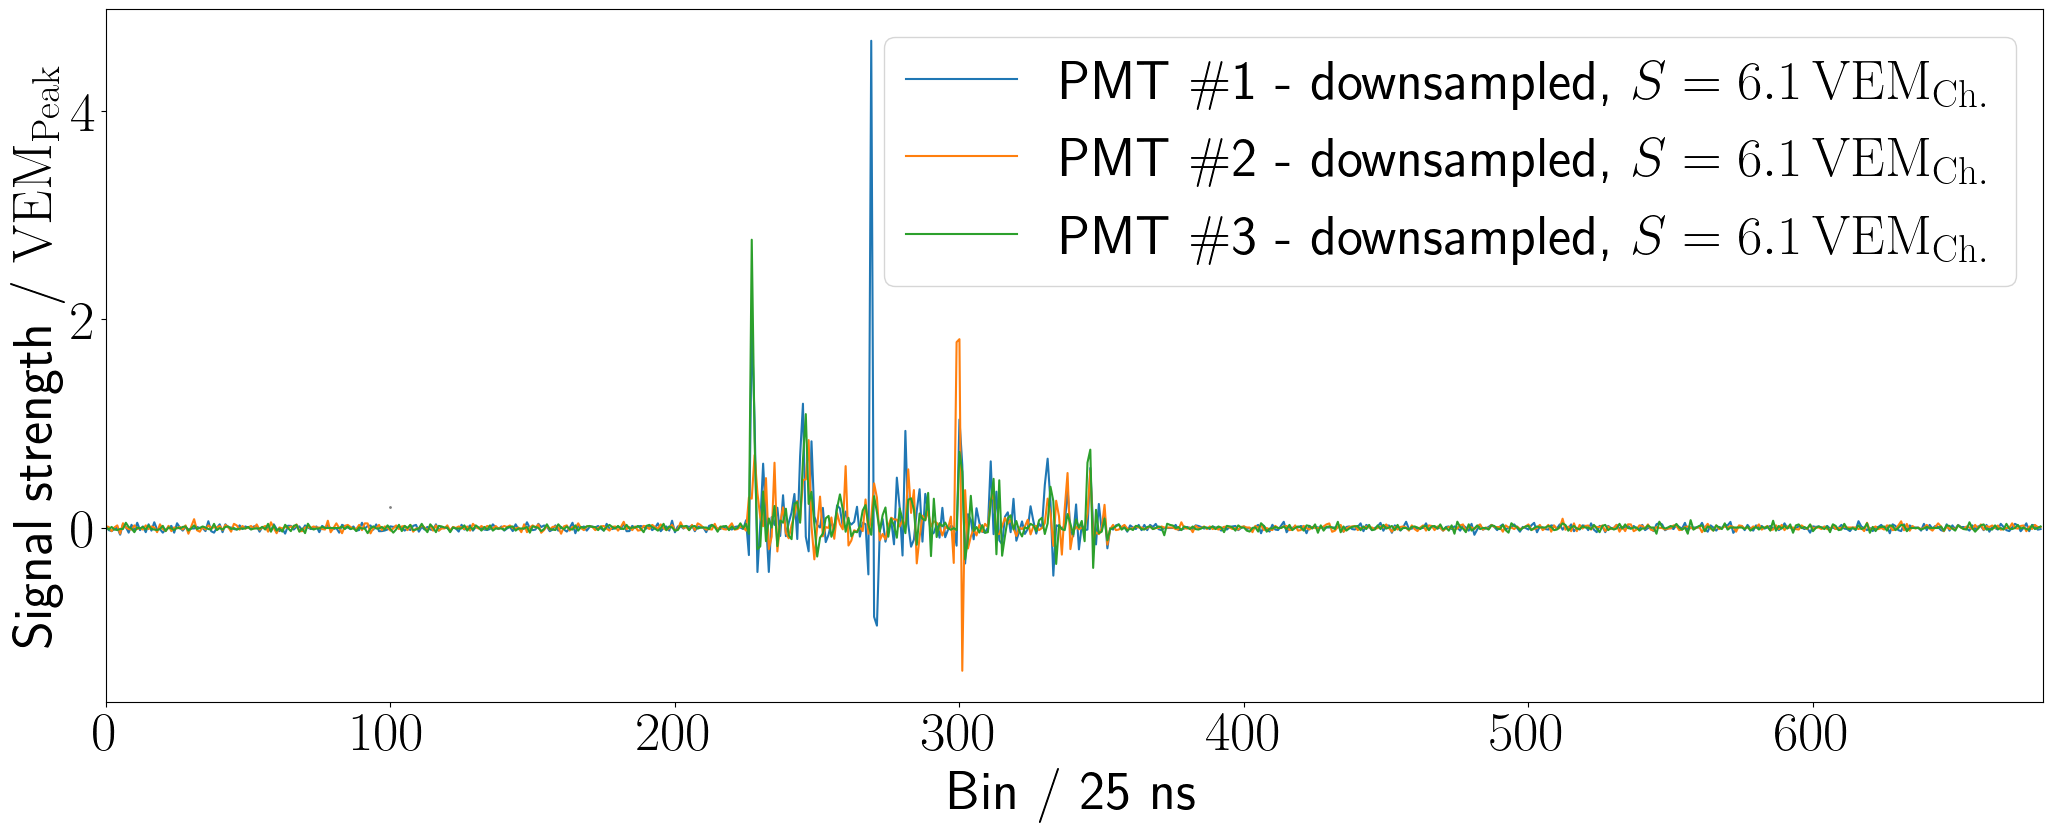

In [23]:
plt.plot(range(681), deconvoluted_trace[0], label = "PMT \#1 - downsampled, $S = 6.1\,\mathrm{VEM}_{\mathrm{Ch.}}$")
plt.plot(range(681), deconvoluted_trace[1], label = "PMT \#2 - downsampled, $S = 4.4\,\mathrm{VEM}_{\mathrm{Ch.}}$")
plt.plot(range(681), deconvoluted_trace[2], label = "PMT \#3 - downsampled, $S = 4.8\,\mathrm{VEM}_{\mathrm{Ch.}}$")

plt.scatter(100, 0.2, s = 1, c = "gray")

plt.ylabel("Signal strength / $\mathrm{VEM}_{\mathrm{Peak}}$")
plt.xlabel("Bin / 25 ns")

plt.legend()
plt.xlim(0, 681)